# Plotly Intro

![plotly_logo](../images/plotly_logo.png)

Plotly has been around for a while as well, being a commercial offering around an open-source core. In older versions, the data and specs would be sent to the plotly servers and rendered there, unless you remembered to turn on offline mode. In the recently-released plotly 4.0, plotly is 100% offline, and I now feel comfortable recommending it. The upload-to-server part has been spun off into its own package if you want to opt-in to 

Plotly, like Bokeh, have developed their own plotly.js library for doing plotting, so much like Bokeh and Altair, the name of the game is constructing JSON specs behind the scenes to be shipped off to the rendering engine. Plotly has both R and python packages, and is the only one on the list to do so.

One point of note - in order for plotly to work on Jupyter Lab the instruction list is fairly long...
```
# Avoid "JavaScript heap out of memory" errors during extension installation
# (OS X/Linux)
export NODE_OPTIONS=--max-old-space-size=4096
# (Windows)
set NODE_OPTIONS=--max-old-space-size=4096

# Jupyter widgets extension
jupyter labextension install @jupyter-widgets/jupyterlab-manager@1.0 --no-build

# jupyterlab renderer support
jupyter labextension install jupyterlab-plotly@1.1.0 --no-build

# FigureWidget support
jupyter labextension install plotlywidget@1.1.0 --no-build

# JupyterLab chart editor support (optional)
jupyter labextension install jupyterlab-chart-editor@1.2 --no-build

# Build extensions (must be done to activate extensions since --no-build is used above)
jupyter lab build

# Unset NODE_OPTIONS environment variable
# (OS X/Linux)
unset NODE_OPTIONS
# (Windows)
set NODE_OPTIONS=
```

It worked fine, but it does make it harder to distribute plotly based notebooks to others

in 4.0 Plotly added a high-level interface called Plotly Express, simplifying plotting when working with DataFrames. 

Let's try the "normal" level API:

In [2]:
import numpy as np
import plotly.graph_objects as go

In [10]:
x = np.arange(1, 100)
y = x ** 2

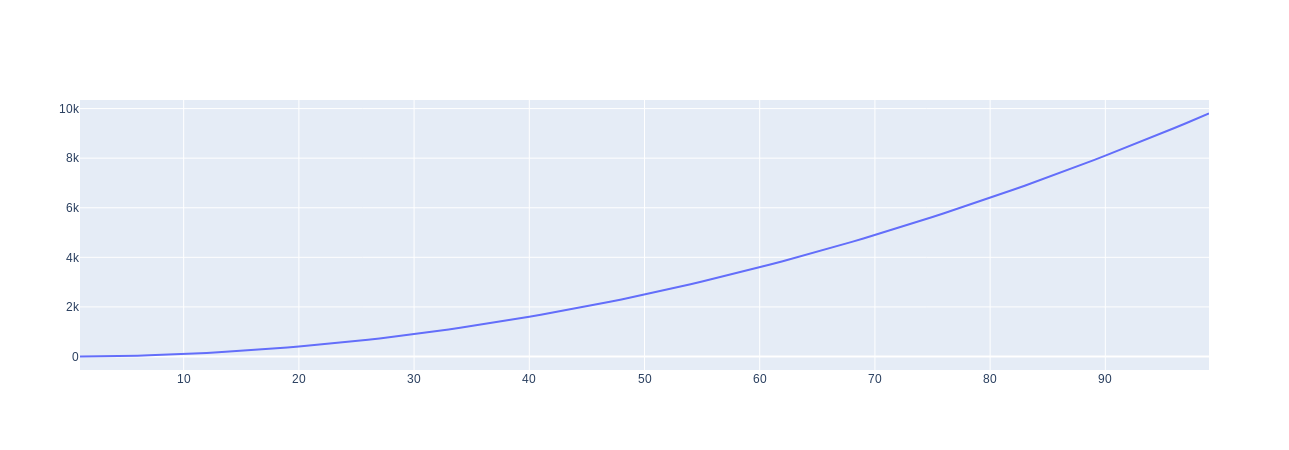

In [14]:
figure = go.Figure()
figure.add_scatter(x=x, y=y, name="Thin Blue Line")

Similar to Bokeh, we get a nicely rendered graph with some interactivity tooling and a little tooltip

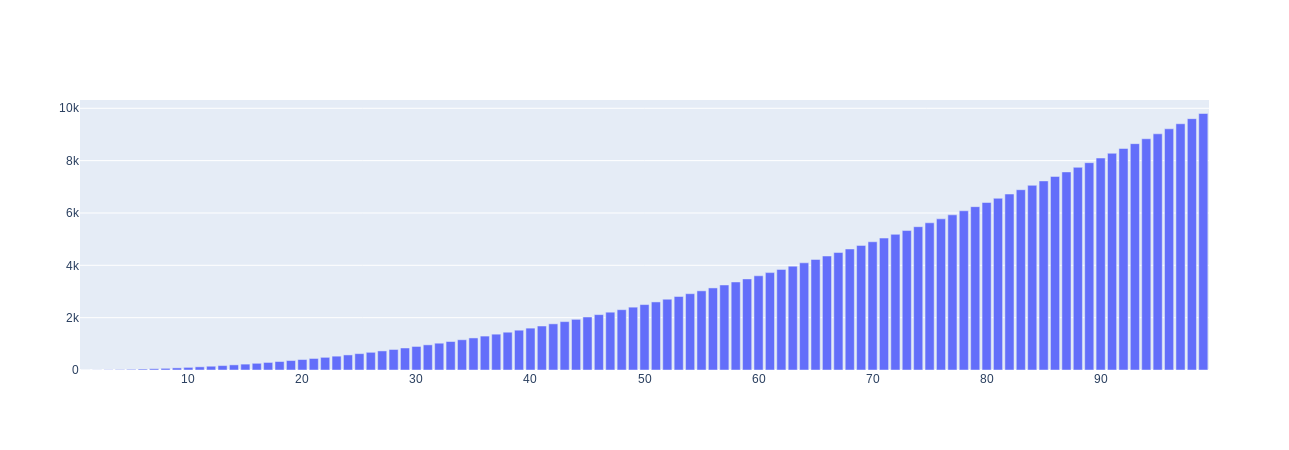

In [15]:
figure2 = go.Figure()
figure2.add_bar(x=x, y=y)

Just like Bokeh, we can combine graphs by plotting on top of them

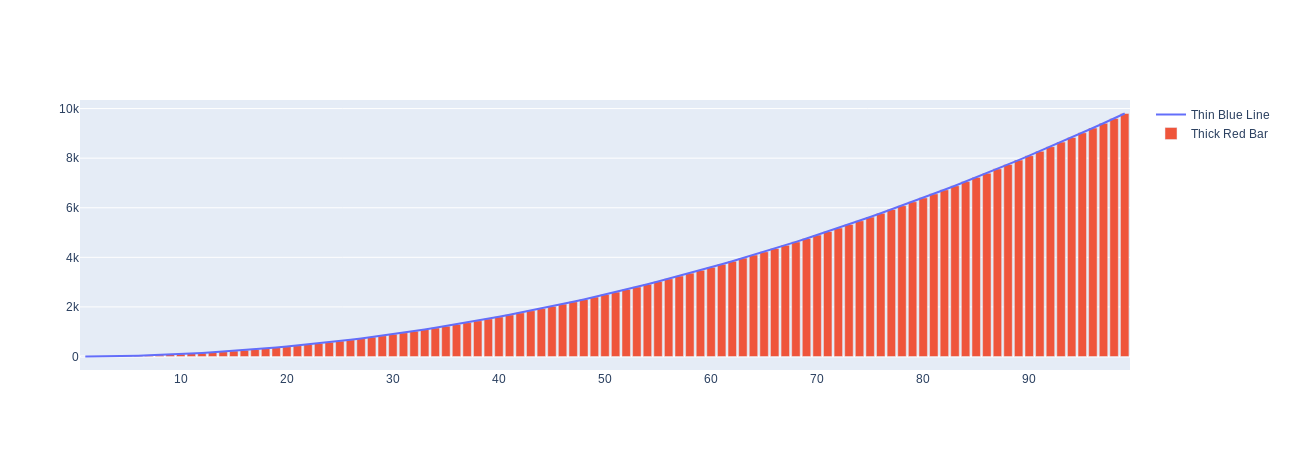

In [16]:
figure.add_bar(x=x, y=y, name="Thick Red Bar")

Note how we can remove elements by clicking on them in the legend - and how Plotly chose different colors automatically when we combined graphs - quite neat!

Let's check out the high level API: 

We can make a nice graph in a one-liner, not bad!

In [18]:
import plotly.express as px
from plotly.subplots
from vega_datasets import data
iris = data.iris()

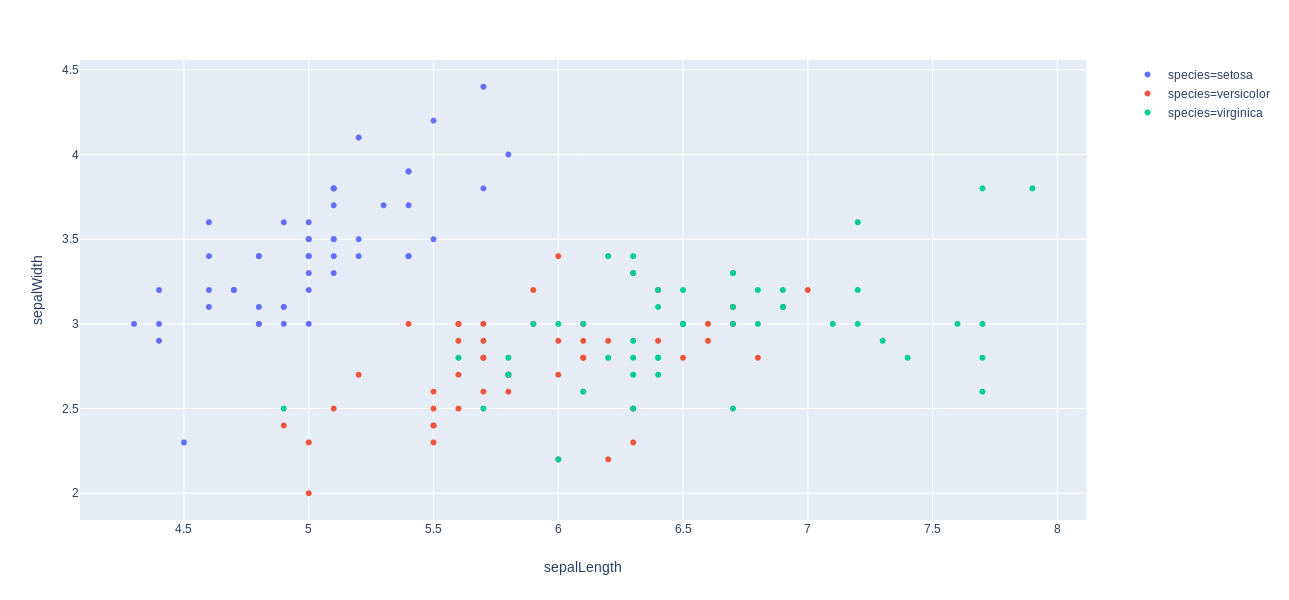

In [21]:
sepal = px.scatter(iris, x='sepalLength', y='sepalWidth', color='species')
sepal

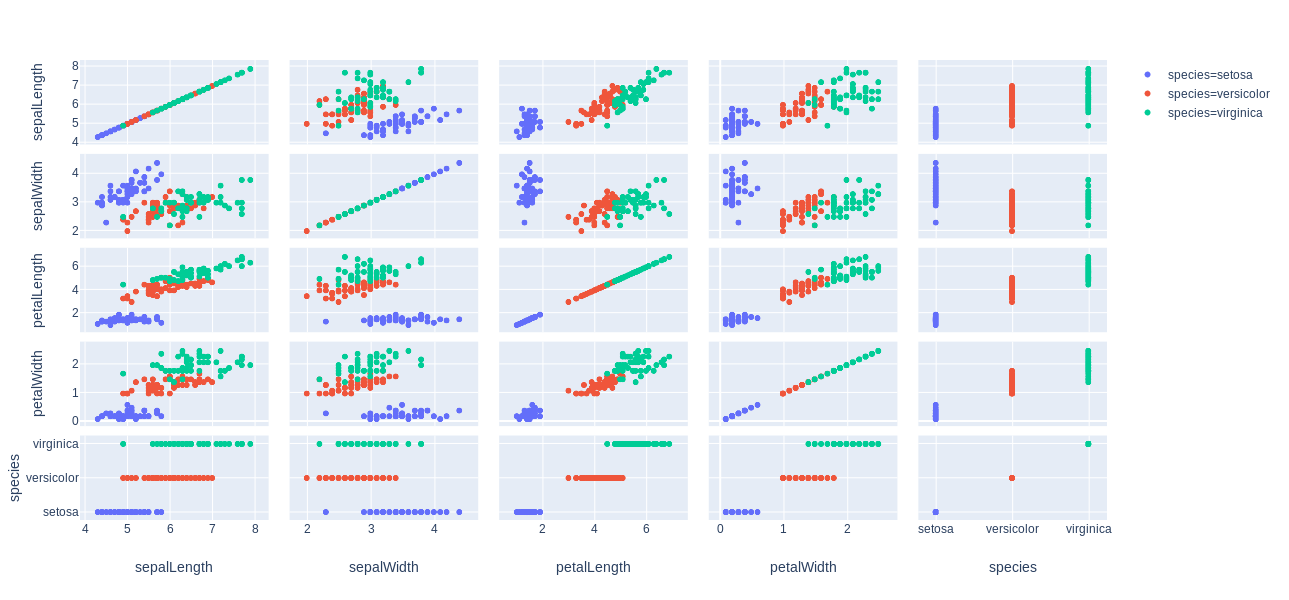

In [25]:
px.scatter_matrix(iris, color='species')

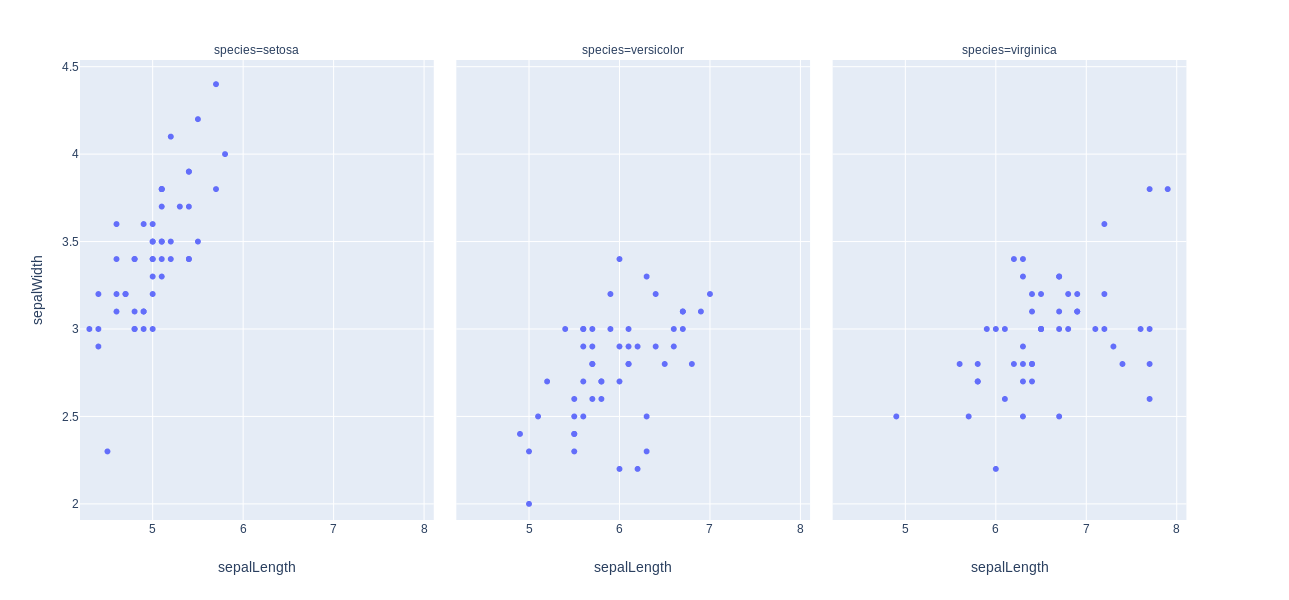

In [27]:
facetted = px.scatter(iris, x='sepalLength', y='sepalWidth', facet_col='species')
facetted

It's a powerful interface, but it's not as easy to compose as the lower-level API.

There is an even lower-level - since we're dealing with JSON, plotly lets us simply define a dictionary with the spec we want, and simply pass it to the render, as is. No plotting library required :-)

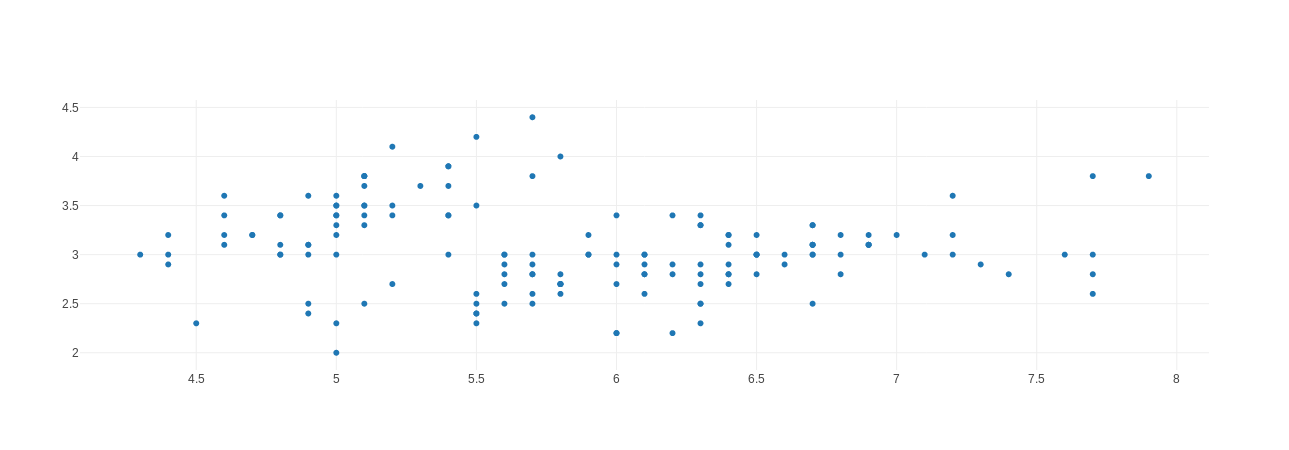

In [31]:
import plotly.io as pio

data = [dict(
  type = 'scatter',
  x = iris.sepalLength,
  y = iris.sepalWidth,
  mode = 'markers',
)]

fig_dict = dict(data=data)
pio.show(fig_dict, validate=False)